# UK- Ecommerce

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew   
import pylab as p

In [3]:
df = pd.read_csv (r'C:\Users\Gaurav\Downloads\Ecommerce - UK Retailer.csv',engine='python')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Basic EDA

<AxesSubplot:>

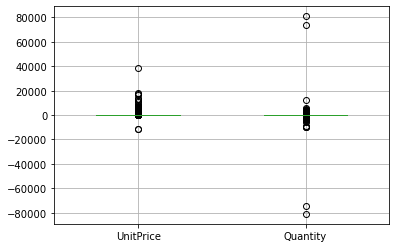

In [6]:
df.boxplot(column=["UnitPrice","Quantity"],widths=0.5)

array([[<AxesSubplot:title={'center':'UnitPrice'}>,
        <AxesSubplot:title={'center':'Quantity'}>]], dtype=object)

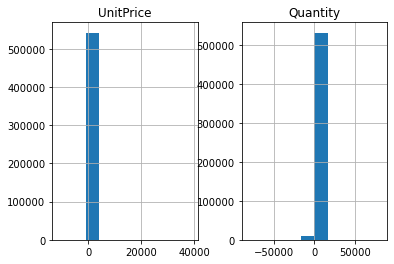

In [7]:
df.hist(column=["UnitPrice","Quantity"])

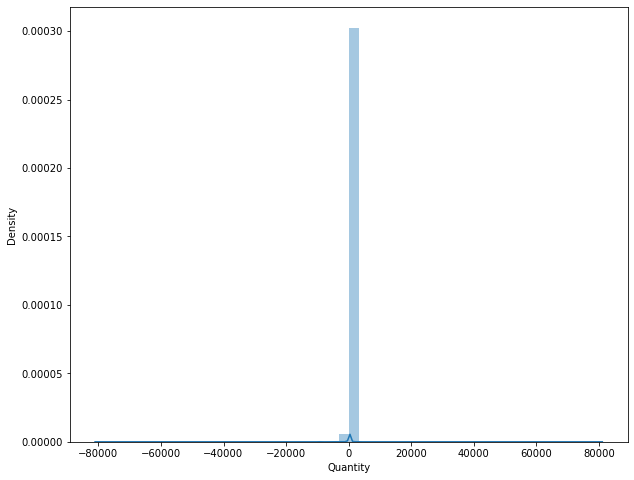

In [10]:
plt.subplots(figsize=(10,8))
sns.distplot(df.Quantity)
plt.show()

In [11]:
df.aggregate("Quantity")

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64

In [12]:
df.aggregate("UnitPrice")

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 541909, dtype: float64

In [13]:
df["StockCode"].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [14]:
df["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [15]:
df["InvoiceNo"].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [16]:
df["Quantity"].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [17]:
df["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [18]:
df["UnitPrice"].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [19]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [20]:
df["InvoiceDate"].unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

In [21]:
df.duplicated(subset=['StockCode'])

0         False
1         False
2         False
3         False
4         False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [22]:
df.duplicated(subset=['InvoiceNo'])

0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [23]:
df.duplicated(subset=['Quantity'])

0         False
1          True
2         False
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [24]:
df.duplicated(subset=['Description'])

0         False
1         False
2         False
3         False
4         False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [25]:
df.duplicated(subset=['InvoiceDate'])

0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [26]:
df.duplicated(subset=['InvoiceDate'])

0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [27]:
df.duplicated(subset=['CustomerID'])

0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [28]:
df.duplicated(subset=['UnitPrice'])

0         False
1         False
2         False
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [29]:
df.duplicated(subset=['Country'])

0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

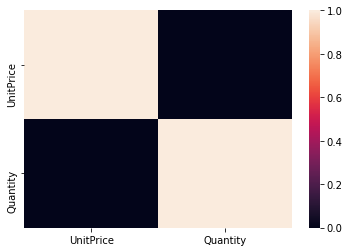

In [31]:
df1 = df[['UnitPrice', 'Quantity']]
sns.heatmap(df1.corr())
plt.show()

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

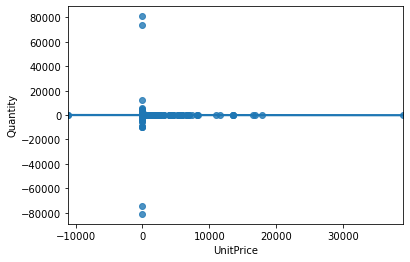

In [35]:
sns.regplot(x="UnitPrice", y="Quantity", data=df)

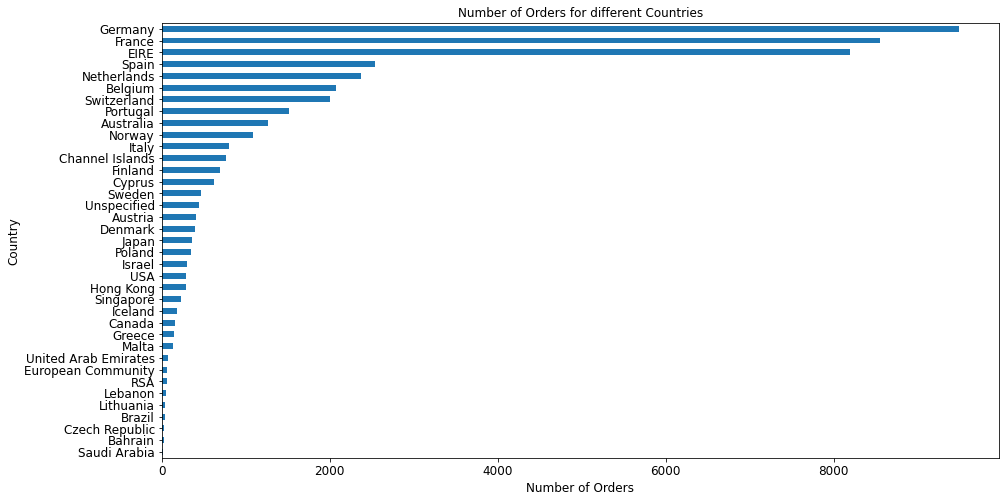

In [36]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom'] # for illustration purpose
 
# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [37]:
num_val=["Quantity","UnitPrice"]
df2=df[num_val]

In [38]:
df2.head()

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


numpy.ndarray

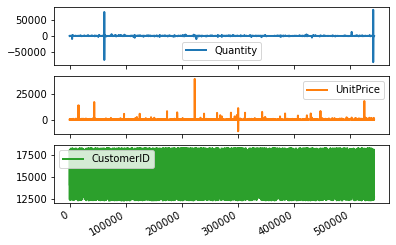

In [39]:
axes = df.plot.line(subplots=True,linewidth=2)
type(axes)


Skewness for data :  1.1108237139164436


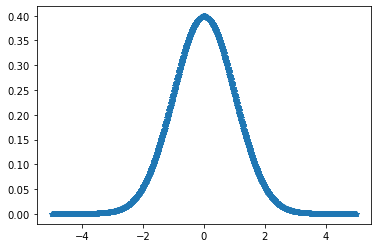

In [40]:
x1 = np.linspace( -5, 5, 1000 ) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
  
p.plot(x1, y1, '*') 
  
print( '\nSkewness for data : ', skew(y1))